In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [16]:


water_year = input('Enter the water year(ie. "19" for 2019): ')
site = input('Enter the site name: ')
if water_year == '00':
    start_year = '1999'
elif 0 < int(water_year) <= 10:
    start_year = '200' + str(int(water_year) - 1)
else:
    start_year = '20' + str(int(water_year) - 1)
print(start_year)

full_year = '20' + water_year

run = str(site) + '_WY' + str(water_year)

2011


In [17]:
summa = xr.open_dataset(f'./model/output/output_{run}_timestep.nc', engine='netcdf4')
summa = summa.sel(time=slice(f'{start_year}-10-15T00:00:00', f'{full_year}-06-30T23:59:59'))

snotel = pd.read_csv(f'./model/snotel_csvs/{run}.csv', index_col='time', parse_dates=True)
snotel = snotel[(snotel.index >= f'{start_year}-10-15T00:00:00') & (snotel.index < f'{full_year}-07-01T00:00:00')]
snotel['SWE'] = snotel['SWE'] * 25.4 # convert inches to mm
snotel['SNOWDEPTH'] = snotel['SNOWDEPTH']/39.37 # convert inches to m
snotel['SNOWDEPTH'] = snotel['SNOWDEPTH'].interpolate(method='linear')
snotel['SWE'] = snotel['SWE'].interpolate(method='linear')

# do 24hr average to smooth out snotel data issues
# snotel['SWE'] = snotel['SWE'].rolling(window=24).mean()
# snotel['SNOWDEPTH'] = snotel['SNOWDEPTH'].rolling(window=24).mean()

In [18]:
summa_den = summa.scalarSWE/summa.scalarSnowDepth

snotel_den = snotel['SWE']/snotel['SNOWDEPTH']

In [19]:
# Convert the DataArray to a DataFrame and reset the index
summa_df = summa['scalarSWE'].to_dataframe()
summa_df.reset_index(inplace=True)

# Round the 'time' column to the nearest hour
summa_df['time'] = summa_df['time'].dt.round('H')

# Set the 'time' column as the index
summa_df.set_index('time', inplace=True)

/tmp/ipykernel_10830/2921394838.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  summa_df['time'] = summa_df['time'].dt.round('H')


In [20]:
start_year

'2011'

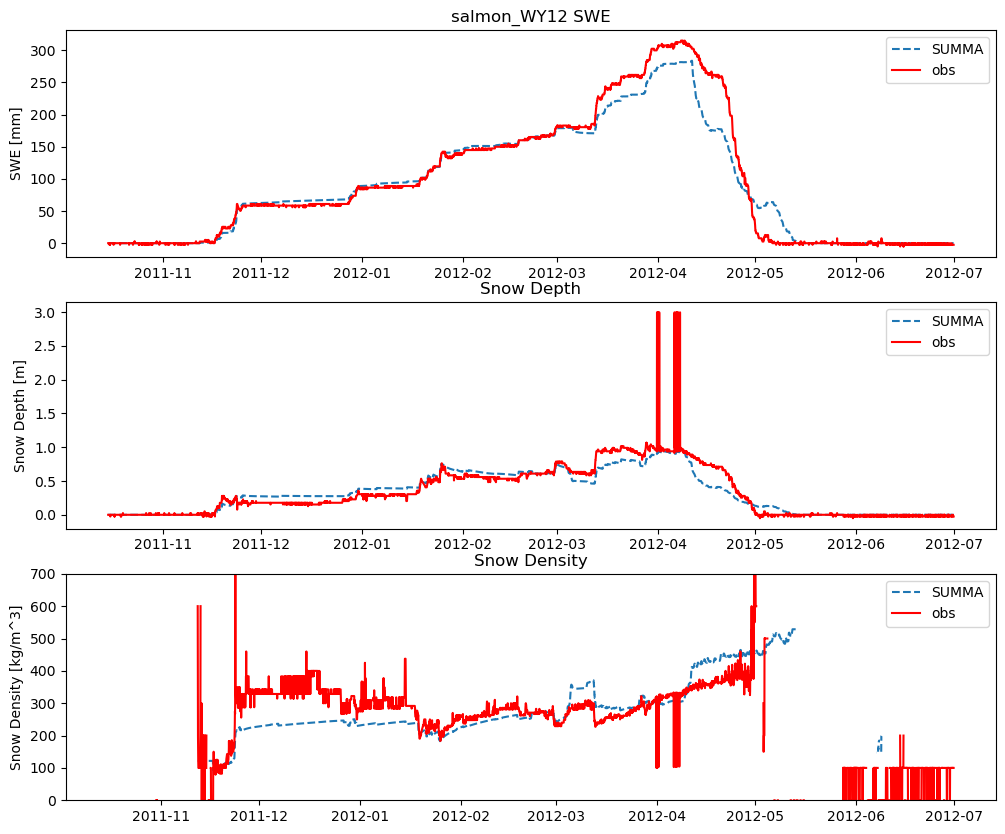

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].plot(summa['time'], summa['scalarSWE'], label='SUMMA', ls='--')
ax[0].plot(snotel.index, snotel['SWE'], label='obs', color='r')
ax[0].set_title(f'{run} SWE')
ax[0].set_ylabel('SWE [mm]')
ax[0].legend()

ax[1].plot(summa['time'], summa['scalarSnowDepth'], label='SUMMA', ls='--')
ax[1].plot(snotel.index, snotel['SNOWDEPTH'], label='obs', color='r')
ax[1].set_title('Snow Depth')
ax[1].set_ylabel('Snow Depth [m]')
# ax[1].set_xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-01-10'))
ax[1].legend()

ax[2].plot(summa['time'], summa_den, label='SUMMA', ls='--')
ax[2].plot(snotel.index, snotel_den, label='obs', color='r')
ax[2].set_title('Snow Density')
ax[2].set_ylabel('Snow Density [kg/m^3]')
ax[2].set_ylim(0,700)
ax[2].legend()
